In [2]:
# Skewed (Imbalance Classification)

# Majority Class ---> The class which has more number of samples (relatively)
# Minority Class ---> The class with less number of samples 

# Decision tree based models handle skewed data very well

In [107]:
from sklearn.datasets import make_classification

X,Y = make_classification(n_samples=500, n_features=2, n_informative=2,random_state=1, n_redundant=0,weights=[0.8,0.2] , flip_y=0.3)

In [63]:
Counter(Y)

Counter({1: 155, 0: 345})

In [64]:
# flipp_y = 0
from collections import Counter
# Counter(Y)
# Counter({1: 20, 0: 80})

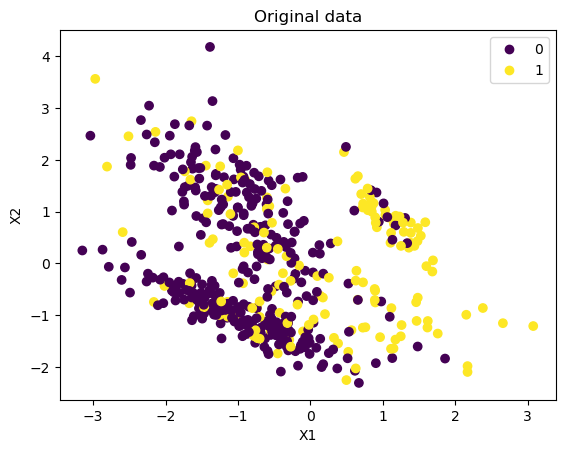

In [108]:
import matplotlib.pyplot as plt 
import numpy as np 
sc = plt.scatter(X[:,0], X[:,1],c=Y)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Original data")
plt.legend(handles = sc.legend_elements()[0], labels = list(np.unique(Y)))
plt.show()

In [66]:
sc.legend_elements()[0]

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=1)

In [68]:
# for real datasets we should scale the data for svm's 
# for Decesion ttree based models scaling is not necessary

In [69]:
from sklearn.svm import SVC
sv = SVC(random_state=1, kernel='linear', C=1)
# Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. 
# The penalty is a squared l2 penalty.
sv.fit(x_train,y_train)

SVC(C=1, kernel='linear', random_state=1)

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test,sv.predict(x_test)))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86       101
           1       0.84      0.43      0.57        49

    accuracy                           0.79       150
   macro avg       0.81      0.69      0.71       150
weighted avg       0.80      0.79      0.76       150



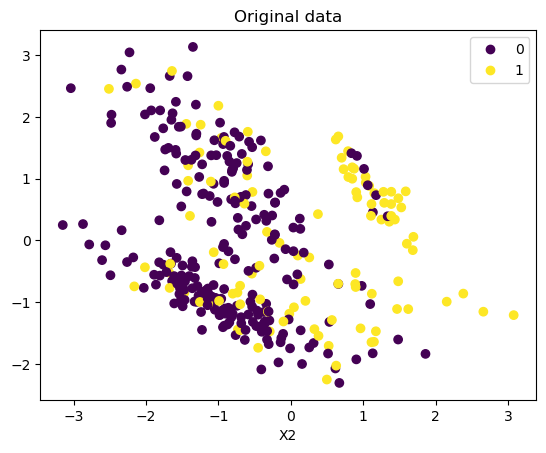

Counter({1: 106, 0: 244})

In [73]:
sc = plt.scatter(x_train[:,0], x_train[:,1],c=y_train)
plt.xlabel("X1")
plt.xlabel("X2")
plt.title("Original data")
plt.legend(handles = sc.legend_elements()[0], labels = list(np.unique(Y)))
plt.show()
Counter(y_train)

## Undersampling --> Reduce the no of samples from majority class

In [74]:
import warnings
warnings.filterwarnings('ignore')

In [75]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy = 1)

# resultant majority samples = minority samples / sampling strategy
resamples_x_train, resamples_y_train = rus.fit_resample(x_train,y_train)

In [81]:
print(Counter(y_train))
print(Counter(resamples_y_train))

Counter({0: 244, 1: 106})
Counter({0: 106, 1: 106})


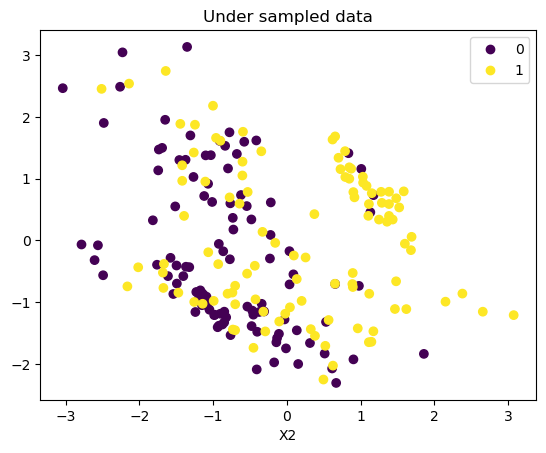

Counter({0: 106, 1: 106})

In [84]:
# Under samples data
sc = plt.scatter(resamples_x_train[:,0], resamples_x_train[:,1],c=resamples_y_train)
plt.xlabel("X1")
plt.xlabel("X2")
plt.title("Under sampled data")
plt.legend(handles = sc.legend_elements()[0], labels = list(np.unique(resamples_y_train)))
plt.show()
Counter(resamples_y_train)

In [85]:
sv.fit(resamples_x_train,resamples_y_train)
print(classification_report(y_test,sv.predict(x_test)))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       101
           1       0.73      0.45      0.56        49

    accuracy                           0.77       150
   macro avg       0.75      0.68      0.70       150
weighted avg       0.76      0.77      0.75       150



#### Drawbacks of undersampling - losing the categorical data
##### --> and if the better samples get removed, then accuracy will drop
##### --> better samples means the support vectors in this case or the samples that are important in making classification

In [ ]:
# least sampling strategy - 
# ({0: 244, 1: 106})

In [86]:
106/244

0.4344262295081967

In [87]:
rus = RandomUnderSampler(sampling_strategy = 0.4)
# least sampling strategy - 0.4344262295081967
resamples_x_train, resamples_y_train = rus.fit_resample(x_train,y_train)

ValueError: The specified ratio required to generate new sample in the majority class while trying to remove samples. Please increase the ratio.

In [88]:
from sklearn.metrics import accuracy_score

accs = []
for ss in np.linspace(0.445,1,10):
    rus = RandomUnderSampler(sampling_strategy = ss, random_state= 1 )
    # least sampling strategy - 0.4344262295081967
    resamples_x_train, resamples_y_train = rus.fit_resample(x_train,y_train)
    sv.fit(resamples_x_train,resamples_y_train)
    accs.append(accuracy_score(y_test,sv.predict(x_test)))

In [89]:
accs

[0.7866666666666666,
 0.78,
 0.7733333333333333,
 0.7666666666666667,
 0.7666666666666667,
 0.7733333333333333,
 0.7733333333333333,
 0.7733333333333333,
 0.7666666666666667,
 0.7533333333333333]

In [91]:
# over sampling
print("Before : " , Counter(y_train))
from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler(sampling_strategy = 1)

# resultant minority samples = majority samples * sampling strategy
resamples_x_train, resamples_y_train = rus.fit_resample(x_train,y_train)
print("After : ",Counter(resamples_y_train))

Before :  Counter({0: 244, 1: 106})
After :  Counter({1: 244, 0: 244})


In [92]:
106/244

0.4344262295081967

In [94]:
# over sampling
# ROSE (Random Over Sampling of Examples)
print("Before : " , Counter(y_train))
from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler(sampling_strategy = 0.45)

# resultant minority samples = majority samples * sampling strategy
resamples_x_train, resamples_y_train = rus.fit_resample(x_train,y_train)
print("After : ",Counter(resamples_y_train))

Before :  Counter({0: 244, 1: 106})
After :  Counter({0: 244, 1: 109})


In [95]:
accs = []

for ss in np.linspace(0.445,1,10):
    rus = RandomOverSampler(sampling_strategy = ss, random_state= 1 )
    # least sampling strategy - 0.4344262295081967
    resamples_x_train, resamples_y_train = rus.fit_resample(x_train,y_train)
    sv.fit(resamples_x_train,resamples_y_train)
    accs.append(accuracy_score(y_test,sv.predict(x_test)))

In [96]:
accs

[0.7866666666666666,
 0.7733333333333333,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7733333333333333,
 0.7666666666666667,
 0.7666666666666667]

In [ ]:
# UnderSampling ---> Information Loss
# OverSampling ---> Overfitting

In [97]:
# Mixture of Oversampling and undersampling

from imblearn.pipeline import Pipeline
mysteps = [("ros", RandomOverSampler(sampling_strategy=0.7)), ("rus", RandomUnderSampler(sampling_strategy= 0.8)),("sv", SVC(C=1, kernel='linear'))]
pipe = Pipeline(steps = mysteps)
pipe.fit(x_train,y_train)

Pipeline(steps=[('ros', RandomOverSampler(sampling_strategy=0.7)),
                ('rus', RandomUnderSampler(sampling_strategy=0.8)),
                ('sv', SVC(C=1, kernel='linear'))])

In [100]:
pipe[2].predict(x_test)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [101]:
accuracy_score(y_test,pipe[2].predict(x_test))

0.7666666666666667

In [102]:
# Mixture of Oversampling and undersampling

from imblearn.pipeline import Pipeline
mysteps = [("ros", RandomOverSampler(sampling_strategy=0.7)), ("rus", RandomUnderSampler(sampling_strategy= 0.8)),("sv", SVC(C=1, kernel='rbf'))]
pipe = Pipeline(steps = mysteps)
pipe.fit(x_train,y_train)
accuracy_score(y_test,pipe[2].predict(x_test))

0.7866666666666666

# SMOTE 
### Synthetic Minority Oversampling TechniquE

In [116]:
X,Y = make_classification(n_samples=30, n_features=2, n_informative=2,random_state=1, n_redundant=0,weights=[0.8,0.2] , flip_y=0.5)

In [117]:
Counter(Y)

Counter({0: 22, 1: 8})

In [119]:
X[Y ==1]

array([[ 0.98022997,  1.66162571],
       [ 1.67109434, -1.35305797],
       [ 0.88003377, -0.78810879],
       [-0.78537879,  0.80400324],
       [-0.79521506,  0.84558779],
       [ 1.19631129,  1.51164295],
       [ 0.69594624,  1.59703162],
       [-1.64295572, -0.68259763]])

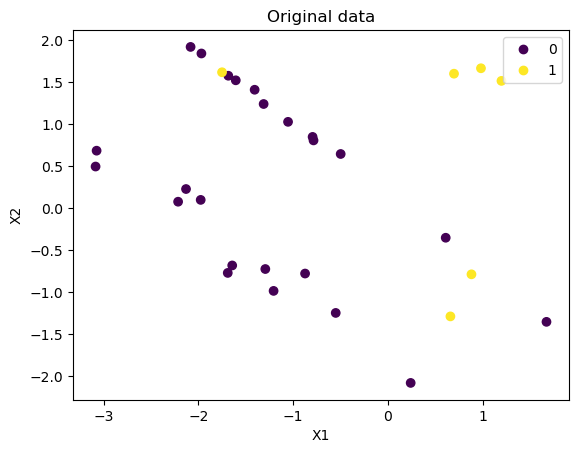

In [110]:
import matplotlib.pyplot as plt 
import numpy as np 
sc = plt.scatter(X[:,0], X[:,1],c=Y)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Original data")
plt.legend(handles = sc.legend_elements()[0], labels = list(np.unique(Y)))
plt.show()

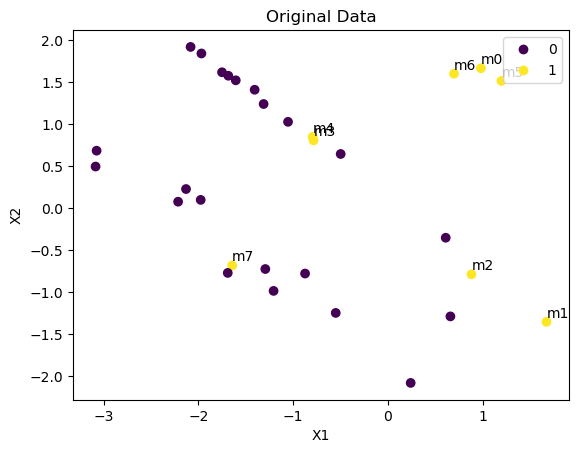

In [120]:
sc = plt.scatter(X[:,0],X[:,1], c = Y)

for i in range(X[Y ==1].shape[0]): # minority examples
    plt.annotate('m'+str(i), xy = [X[Y ==1][i][0],X[Y ==1][i][1]], xytext = [X[Y ==1][i][0],X[Y ==1][i][1] + 0.05])

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Original Data')
plt.legend(handles = sc.legend_elements()[0], labels = list(np.unique(Y)))
plt.show()

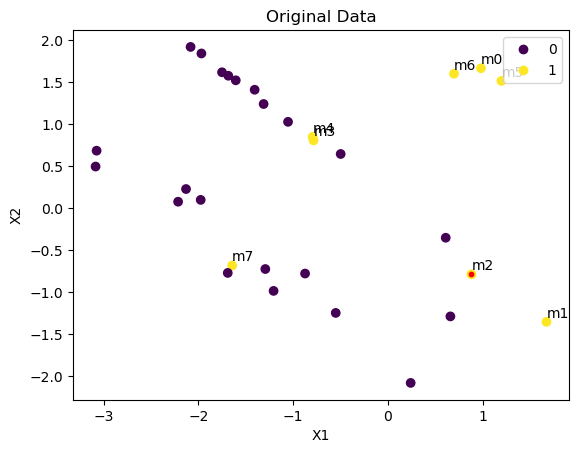

In [126]:
# Step1: Select an example at random --> m2
# SMOTE Hyperparameter --> k_neighbors = 3
sc = plt.scatter(X[:,0],X[:,1], c = Y)

for i in range(X[Y ==1].shape[0]): # minority examples
    plt.annotate('m'+str(i), xy = [X[Y ==1][i][0],X[Y ==1][i][1]], xytext = [X[Y ==1][i][0],X[Y ==1][i][1] + 0.05])

plt.scatter(X[Y ==1][2][0],X[Y ==1][2][1], color = 'red', s = 10)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Original Data')
plt.legend(handles = sc.legend_elements()[0], labels = list(np.unique(Y)))
plt.show()

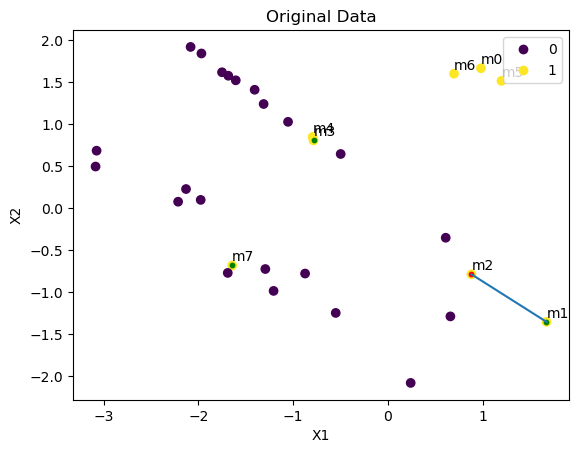

In [132]:
# Step2: Select any one of the three nearest neigbbors
sc = plt.scatter(X[:,0],X[:,1], c = Y)

for i in range(X[Y ==1].shape[0]): # minority examples
    plt.annotate('m'+str(i), xy = [X[Y ==1][i][0],X[Y ==1][i][1]], xytext = [X[Y ==1][i][0],X[Y ==1][i][1] + 0.05])
 
plt.scatter(X[Y ==1][2][0],X[Y ==1][2][1], color = 'red', s = 10)
plt.scatter(X[Y ==1][1][0],X[Y ==1][1][1], color = 'green', s = 10)
plt.scatter(X[Y ==1][3][0],X[Y ==1][3][1], color = 'green', s = 10)
plt.scatter(X[Y ==1][7][0],X[Y ==1][7][1], color = 'green', s = 10)

# Selected nearest neighbor
plt.plot([X[Y ==1][2][0], X[Y ==1][1][0]],[X[Y ==1][2][1],X[Y ==1][1][1]])


plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Original Data')
plt.legend(handles = sc.legend_elements()[0], labels = list(np.unique(Y)))
plt.show()

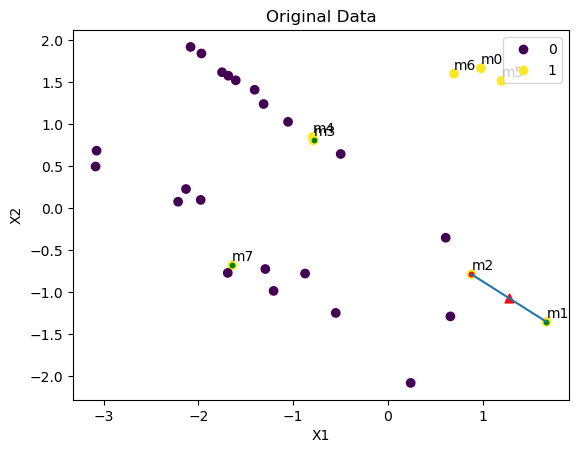

In [133]:
# Step3: Generate the point in the middle of the selected sample and its randomly chosen neighbor
sc = plt.scatter(X[:,0],X[:,1], c = Y)

for i in range(X[Y ==1].shape[0]): # minority examples
    plt.annotate('m'+str(i), xy = [X[Y ==1][i][0],X[Y ==1][i][1]], xytext = [X[Y ==1][i][0],X[Y ==1][i][1] + 0.05])
 
plt.scatter(X[Y ==1][2][0],X[Y ==1][2][1], color = 'red', s = 10)
plt.scatter(X[Y ==1][1][0],X[Y ==1][1][1], color = 'green', s = 10)
plt.scatter(X[Y ==1][3][0],X[Y ==1][3][1], color = 'green', s = 10)
plt.scatter(X[Y ==1][7][0],X[Y ==1][7][1], color = 'green', s = 10)

# Selected nearest neighbor
plt.plot([X[Y ==1][2][0], X[Y ==1][1][0]],[X[Y ==1][2][1],X[Y ==1][1][1]])

# Synthetically generated point in the middle
plt.scatter((X[Y ==1][1][0] + X[Y ==1][2][0])/2,(X[Y ==1][2][1] + X[Y ==1][1][1])/2, color = 'red', s = 40, marker = '^')


plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Original Data')
plt.legend(handles = sc.legend_elements()[0], labels = list(np.unique(Y)))
plt.show()

In [137]:
from imblearn.over_sampling import SMOTE
print("Before",Counter(Y))
sm = SMOTE(sampling_strategy = 1)
resamples_x, resamples_y = sm.fit_resample(X,Y)
print("After SMOTE : ", Counter(resamples_y))

Before Counter({0: 22, 1: 8})
After SMOTE :  Counter({0: 22, 1: 22})


In [ ]:
# SMOTE - Considers only minority points and generates points. it doesn't consider any majority points

# AdaSYnSMOTE - Considers Majority points and doesn't create any points near the area where points are of majority class

# SVM -  See the decision boundary and create the points on the side off minority points, so that the accuracy does not effect